In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_selection
from sklearn.metrics import mean_squared_error, r2_score
import hvplot.pandas

In [8]:
redwine =  pd.read_csv("winequality-red.csv")
redwine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [9]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
redwine.isnull()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  total sulfur dioxide  density     pH  sulphates  \
0                   False                 False    False  False      False   
1                   False                 False    False  False      False   
2                   False                 False    False  False      False   
3                   False                 False    False  False      False   
4                   False                 False    False  False      False   
...                   ...                   ...      ...    ...        ...   
1594                False                 False    False  False      False   
1595                False                 False    False  False      False   
1596                False                 False    False  False      False   
1597                False                 False    False  False      False   
1598                False                 False    False  False      False   

      alcohol  quality  
0       False    False  
1       False    False  
2       False    False  
3       False    False  
4       False    False  
...       ...      ...  
1594    False    False  
1595    False    False  
1596    False    False  
1597    False    False  
1598    False    False  

[1599 rows x 12 columns]

In [11]:
redwine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

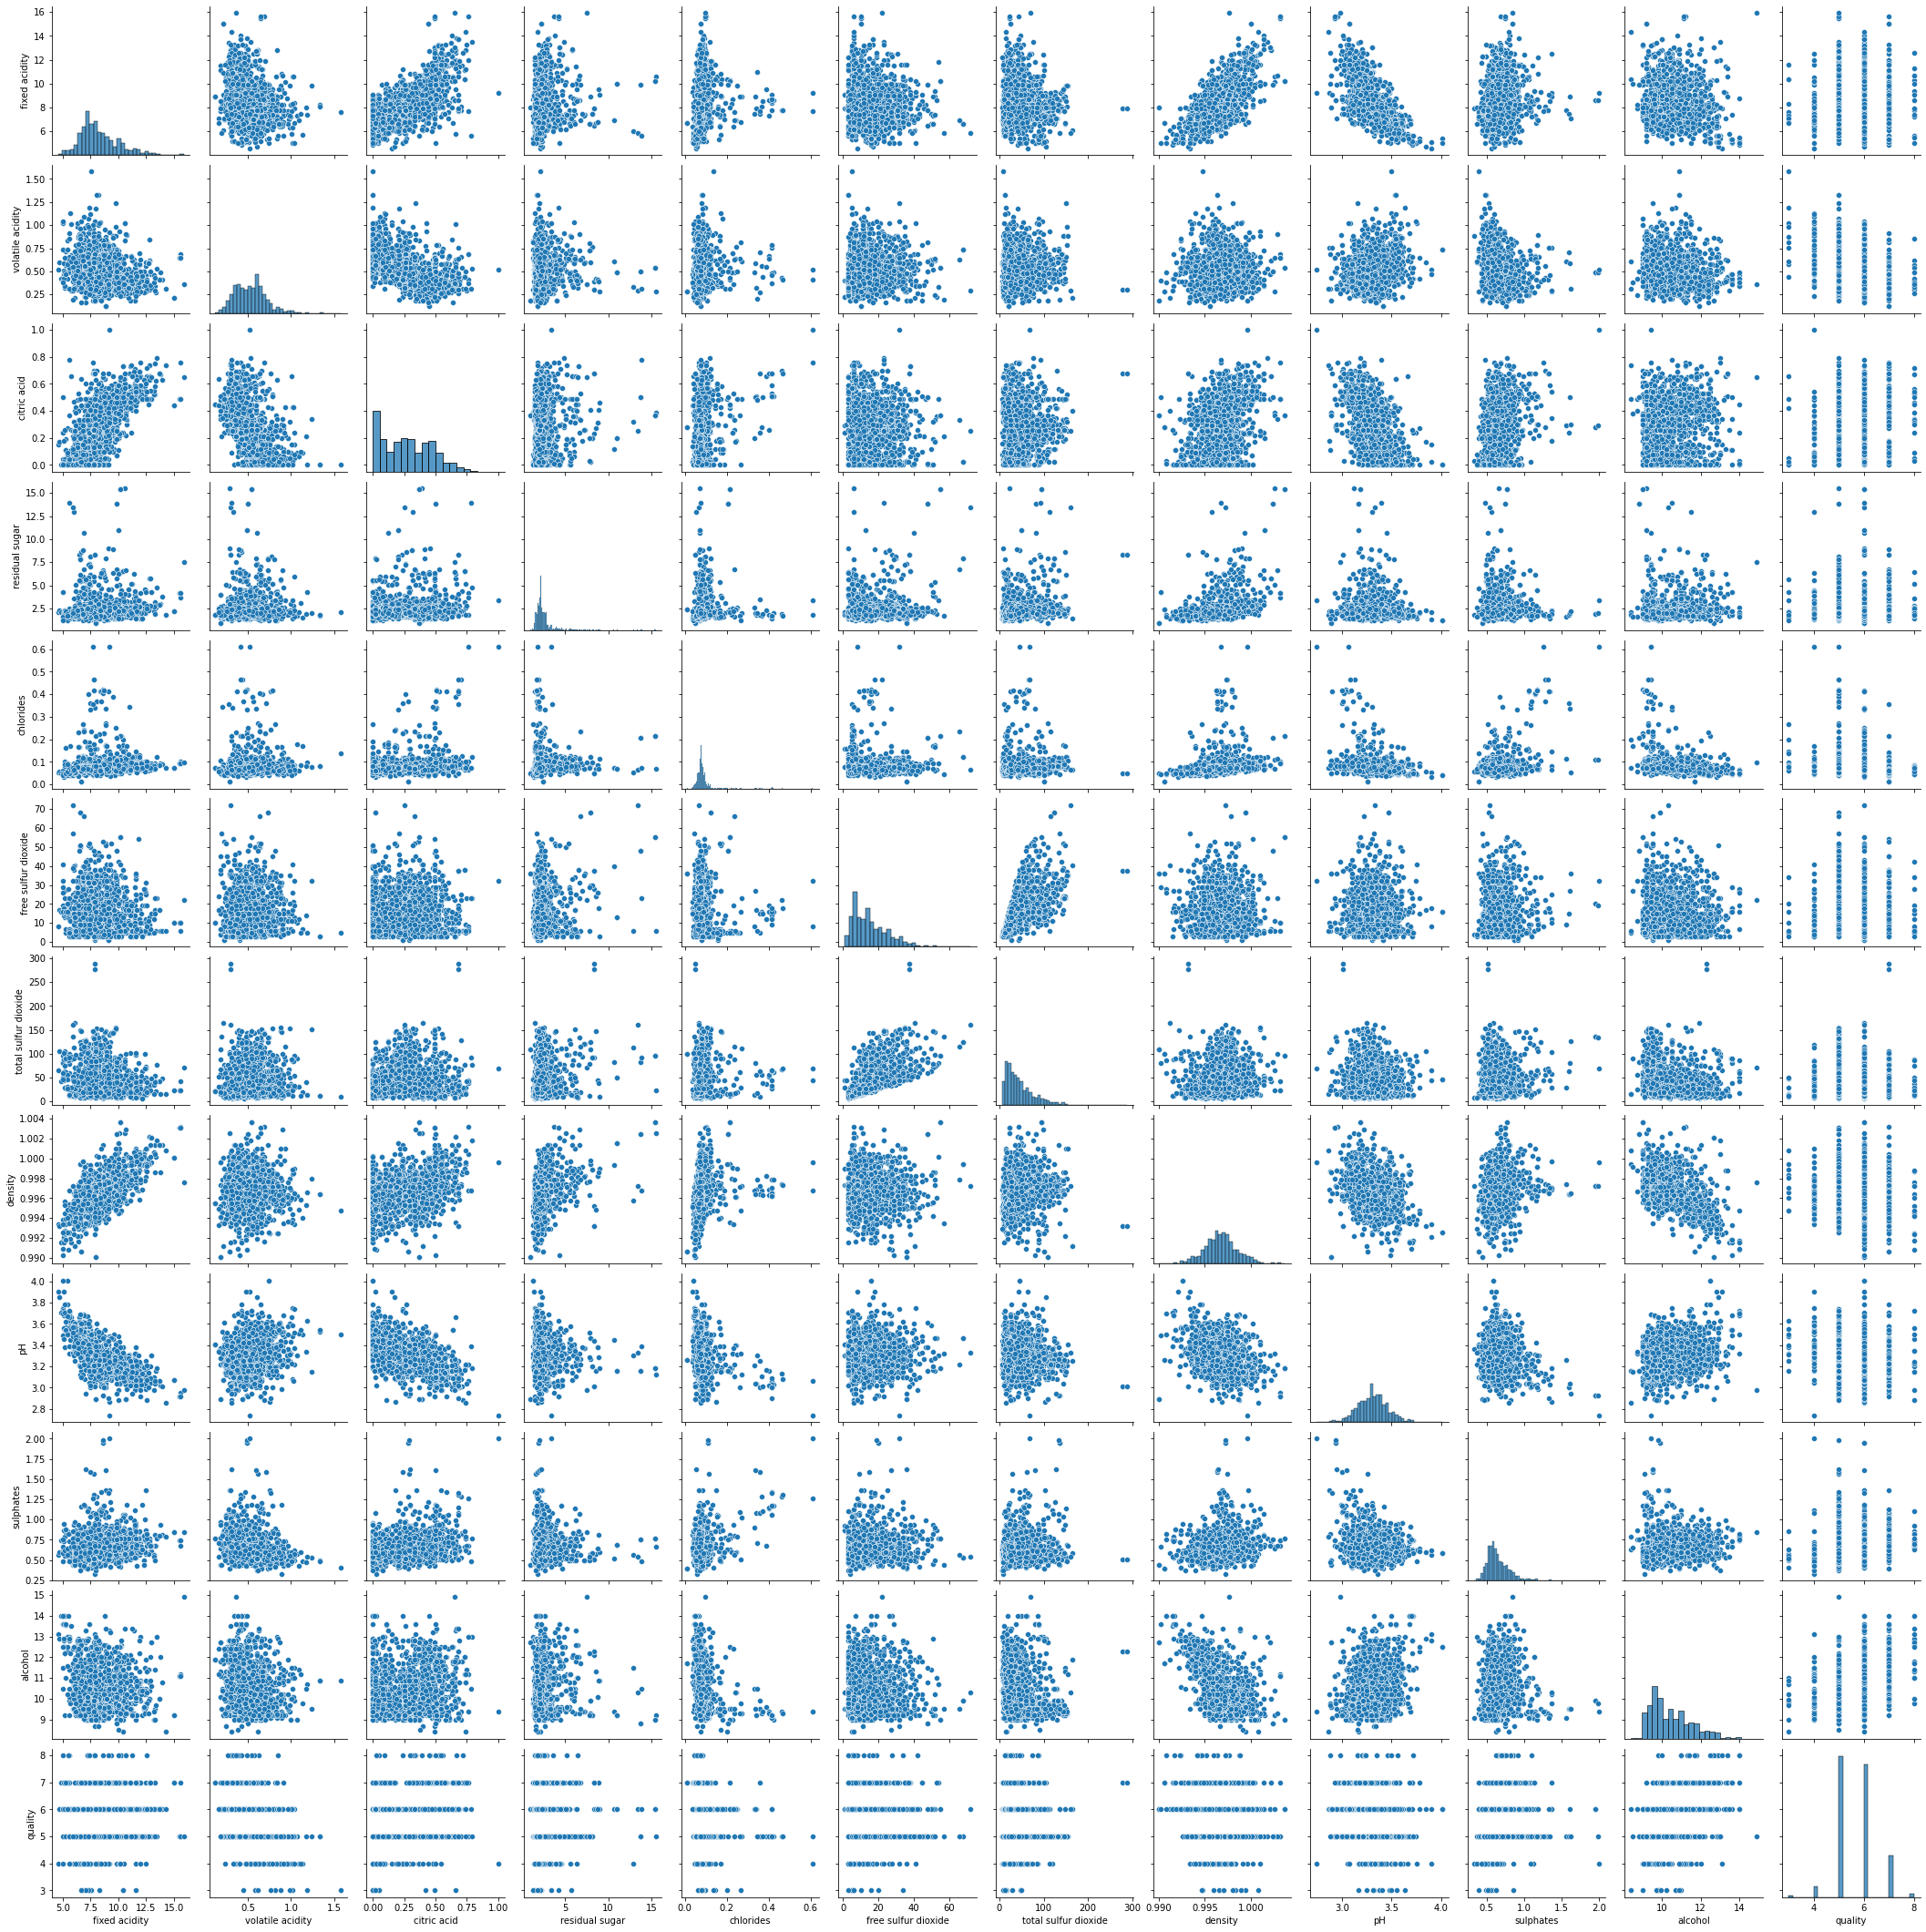

In [12]:
sns.pairplot(redwine)

In [14]:
y = redwine.quality
X = redwine.drop(["quality"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
X_train.shape, y_train.shape

((1279, 11), (1279,))

In [16]:
X_test.shape, y_test.shape

((320, 11), (320,))

In [17]:
redwine_model = linear_model.LinearRegression()

In [18]:
redwine_model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_predict = redwine_model.predict(X_test)

In [22]:
print("Coefficient: ", redwine_model.coef_)
print("Intercept: ", redwine_model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predict))
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_predict)))
print("R squared score: %.2f" % r2_score(y_test, y_predict))

Coefficient:  [ 4.12835075e-02 -1.14952802e+00 -1.77927063e-01  2.78700036e-02
 -1.87340739e+00  2.68362616e-03 -2.77748370e-03 -3.15166657e+01
 -2.54486051e-01  9.24040106e-01  2.67797417e-01]
Intercept:  34.99871062872093
Mean squared error: 0.38
Root Mean squared error: 0.62
R squared score: 0.33


In [23]:
y.mean()

5.6360225140712945

In [25]:
np.array(y_predict)

array([5.7829301 , 5.03619267, 6.59698929, 5.33912637, 5.93952898,
       5.0072068 , 5.39616171, 6.05211188, 4.86760343, 4.95067572,
       5.28580441, 5.41265269, 5.7057424 , 5.12921737, 5.52885206,
       6.38052412, 6.81012527, 5.73803346, 5.97618825, 5.08613415,
       6.34479863, 5.16400983, 5.64203971, 6.1462903 , 5.4817802 ,
       5.03391406, 5.18721293, 6.48783659, 5.33301372, 6.30458308,
       6.03452293, 5.82849303, 5.58503524, 5.28512701, 5.75656128,
       6.15273792, 5.14134479, 5.48228021, 6.38983359, 5.7901819 ,
       5.42936928, 6.04810414, 6.70159678, 6.60160183, 5.97253803,
       4.78890763, 5.49565005, 6.01881894, 5.48895041, 6.10824243,
       5.3126164 , 5.28492351, 5.76043226, 6.36081498, 5.7195388 ,
       5.26971928, 5.08498332, 5.31050693, 6.50895816, 5.44323413,
       5.16377401, 5.76427324, 6.0703837 , 6.28933679, 5.07315141,
       6.11874641, 5.35681067, 6.01343647, 6.12184268, 5.98547673,
       5.35327968, 5.4367731 , 5.06017324, 5.58939889, 5.62593

<AxesSubplot:xlabel='quality'>

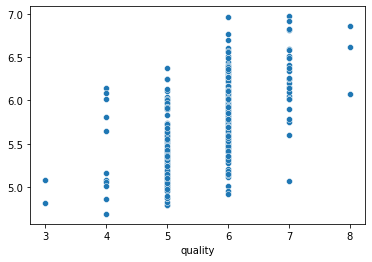

In [26]:
sns.scatterplot(x=y_test, y=y_predict)

In [27]:
test_residual = y_test - y_predict

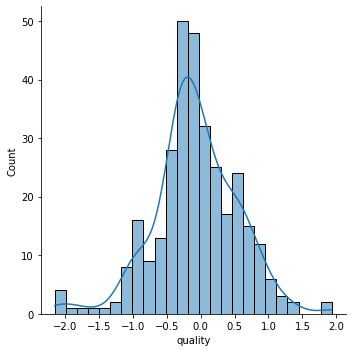

In [29]:
sns.displot(test_residual, bins=25, kde=True)

In [32]:
pd.DataFrame({"Error Value" : (test_residual)}).hvplot.kde()

:Distribution   [Error Value]   (Density)